In [102]:
import numpy as np
def foo(M, t):
    w,V = np.linalg.eig(M)
    e = V @ np.diag(np.exp(w*t)) @ np.linalg.inv(V)
    phi = e[:,0]
    return phi/np.linalg.norm(phi)

In [96]:
from ideal_qite import *
from hamiltonians import *
from qiskit import Aer

f_ = 2

hm_list = [
    [[2], [1], [0]],
#    [[1,3], [1,1], [(1,1)]],
#    [[1,3], [1,1], [(0,0),(1,0)]],
]
d=1
l=1
qmap = {(0,0): 0, (0,1):1, (1,0): 2,  (1,1):3}
H = Hamiltonian(hm_list, d, l)#, qmap)
# H.multiply_scalar(1j)
D = 0

db = 0.1
delta = 0.0
N = 50
num_shots=0
backend = Aer.get_backend('statevector_simulator')


from qite_params import QITE_params

params = QITE_params(H)
params.load_hamiltonian_params(D, False)
params.set_run_params(db, delta, N, num_shots, backend)#, init_sv=[np.sqrt(0.5)]*2)

def foo(M, t):
    w,V = np.linalg.eig(M)
    e = V @ np.diag(np.exp(w*t)) @ np.linalg.inv(V)
    return e[:,0]

foo(m, 1)

Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
	Calculating Required Pauli Measurements... Done


array([-1.22124549+1.02299032e-17j,  0.94600312+7.88528830e-17j])

In [97]:
E,times, svs, alist = qite(params)

Starting Ideal QITE Simulation:
Iteration 1... Done -- Iteration time = 0.06 seconds
Iteration 2... Done -- Iteration time = 0.05 seconds
Iteration 3... Done -- Iteration time = 0.07 seconds
Iteration 4... Done -- Iteration time = 0.05 seconds
Iteration 5... Done -- Iteration time = 0.05 seconds
Iteration 6... Done -- Iteration time = 0.05 seconds
Iteration 7... Done -- Iteration time = 0.05 seconds
Iteration 8... Done -- Iteration time = 0.05 seconds
Iteration 9... Done -- Iteration time = 0.05 seconds
Iteration 10... Done -- Iteration time = 0.04 seconds
Iteration 11... Done -- Iteration time = 0.05 seconds
Iteration 12... Done -- Iteration time = 0.04 seconds
Iteration 13... Done -- Iteration time = 0.05 seconds
Iteration 14... Done -- Iteration time = 0.05 seconds
Iteration 15... Done -- Iteration time = 0.05 seconds
Iteration 16... Done -- Iteration time = 0.04 seconds
Iteration 17... Done -- Iteration time = 0.04 seconds
Iteration 18... Done -- Iteration time = 0.05 seconds
Itera

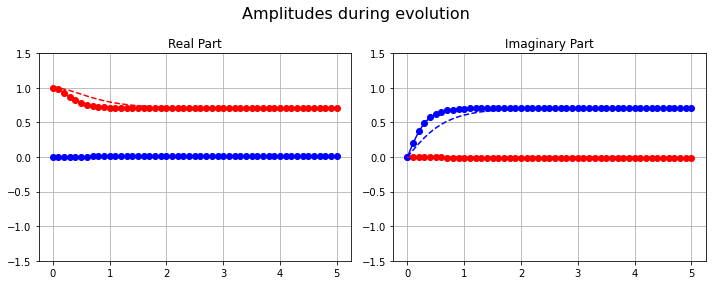

In [105]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,4))
axs = [f.add_subplot(121), f.add_subplot(122)]
t = np.arange(0,N+1,1)*db
re = np.real(svs)
im = np.imag(svs)

theory = np.zeros( (N+1,2), dtype=complex )
for i in range(N+1):
    theory[i,:] = foo(H.get_matrix(), i*db)

axs[0].plot(t,re[:,0],'ro-', label='|0>')
axs[0].plot(t,re[:,1],'bo-', label='|1>')

axs[0].plot(t, np.real(theory[:,0]), 'r--', label='theory |0>' )
axs[0].plot(t, np.real(theory[:,1]), 'b--', label='theory |0>' )

# axs[0].plot(t, csh, 'r--', label='theory')

# axs[0].axhline(y=np.sqrt(0.5))
# axs[0].axhline(y=-np.sqrt(0.5))

# axs[0].plot(t,np.cos(f_*t)*np.sqrt(0.5), 'r--', label='cos(ft)')
# axs[0].plot(t,-np.sin(2*f_*t), 'b--', label='-sin(2ft)')
# axs[0].plot(t,np.cos(2*f_*t), 'g--', label='cos(2ft)')
axs[1].plot(t,im[:,0],'ro-', label='|0>')
axs[1].plot(t,im[:,1],'bo-', label='|1>')

axs[1].plot(t, np.imag(theory[:,0]), 'r--', label='theory |0>' )
axs[1].plot(t, np.imag(theory[:,1]), 'b--', label='theory |0>' )

# axs[1].plot(t, snh, 'b--', label='theory')

# axs[1].plot(t,np.sin(f_*t), 'b--', label='sin(ft)')
# axs[1].plot(t,np.sin(2*f_*t), 'g--', label='sin(2ft)')

axs[0].set_ylim(-1.5,1.5)
axs[1].set_ylim(-1.5,1.5)

axs[0].title.set_text('Real Part')
axs[1].title.set_text('Imaginary Part')


# axs[0].legend(loc='best')
# axs[1].legend(loc='best')

axs[0].grid()
axs[1].grid()

f.suptitle('Amplitudes during evolution', fontsize=16)
f.tight_layout()
plt.show()

In [103]:
H.get_matrix()

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [104]:
foo(H.get_matrix(), 1)

array([0.79555082+0.j        , 0.        +0.60588686j])